In [1]:
import torch
import torch.nn as nn
#transforms para transformar as imagens em tensores
from torchvision import datasets, transforms
#separar treino e teste, dataloader para ajudar a organizar as imagens em batches
from torch.utils.data import random_split, DataLoader

In [2]:
#baixar e transformar as imagens em tensores

#importação do sistema operacional para validar se a pasta existe ou não
import os
#se a pasta existe ele não faz o download
if os.path.exists('./data') == True:
    dataset = datasets.MNIST('data', train=True, download=False, transform=transforms.ToTensor()) 
    print('A pasta já existe')
#se não ele faz o download da pasta
else:
    dataset = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

A pasta já existe


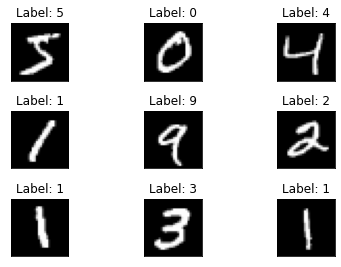

In [3]:
from matplotlib import pyplot as plt

#visualizando as imagens e suas classificações
fig = plt.figure()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(dataset.data[i], cmap='gray')
    plt.title('Label: {}'.format(dataset.targets[i]))
    plt.xticks([])
    plt.yticks([])

In [4]:
#classes de 0 a 9
dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
#no pytorch size é = a shape, tamanho dos dados, já são tensores
dataset.data.size()

torch.Size([60000, 28, 28])

In [6]:
#tensores de uma das imagens
print(dataset.data[5])
#classe da imagem 
print(dataset.targets[5])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [7]:
#separando os dados de treino e teste
treino, teste = random_split(dataset, [50000, 10000])
#definindo a quantidade de imagens para treinar mais rápido o modelo
loader_treino = DataLoader(treino, batch_size=32)
loader_teste  = DataLoader(teste, batch_size=32)

In [8]:
#o código que define a arquitetura da rede neural virou uma biblioteca e está sendo importada
from modelo import modelo

In [9]:
# Instancia o modelo
model = modelo()
#podemos ver as entradas e saídas
#bias = intercept 
model

modelo(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# Define a função de perda e o otimizador
#erro é a distancia entre o real e o predito
funcao_erro = nn.CrossEntropyLoss()
#otimizador da rede
otimizador = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
#TREINAMENTO DO MODELO
#numero de passagens pelo conjunto para o treinamento
num_epocas = 5
#vai passar por todos os datapoints do treino e fazer a atualização da rede
for epoca in range(num_epocas):
    model.train()
    train_loss = 0.0
    train_correct = 0
    #iteração para cada batch
    for data, target in loader_treino:
        #limpar o os gradientes
        #não é dos coeficientes e sim das derivadas parciais caso contrário continuará somando e irá acumular
        otimizador.zero_grad()
        output = model(data)
        #calcula o erro
        erro = funcao_erro(output, target)
        #inicio do backpropagation
        #calculo das derivadas parciais
        #calculando os gradientes para saber qual a direção para atualizar os coeficientes
        erro.backward()
        #o otimizador é quem atualiza os coeficientes
        otimizador.step()

        train_loss += erro.item() * data.size(0)
        _, pred = torch.max(output, 1)
        train_correct += (pred == target).sum().item()

    train_loss = train_loss / len(loader_treino.dataset)
    train_acc = train_correct / len(loader_treino.dataset)
    
#TESTE DO MODELO
    model.eval()
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for data, target in loader_teste:
            output = model(data)
            erro = funcao_erro(output, target)

            val_loss += erro.item() * data.size(0)
            _, pred = torch.max(output, 1)
            val_correct += (pred == target).sum().item()

    val_loss = val_loss / len(loader_teste.dataset)
    val_acc = val_correct / len(loader_teste.dataset)

    print(f'Epoca: {epoca + 1}, Erro treino:{erro.item():.2f}, Acurácia treino: {train_correct/len(treino):.2f}, Acurácia teste: {val_correct/len(teste):.2f}' )

#salvar o modelo    
torch.save(model.state_dict(), 'mnist_model.pt')

Epoca: 1, Erro treino:1.57, Acurácia treino: 0.89, Acurácia teste: 0.93
Epoca: 2, Erro treino:1.49, Acurácia treino: 0.94, Acurácia teste: 0.95
Epoca: 3, Erro treino:1.51, Acurácia treino: 0.96, Acurácia teste: 0.95
Epoca: 4, Erro treino:1.47, Acurácia treino: 0.96, Acurácia teste: 0.96
Epoca: 5, Erro treino:1.52, Acurácia treino: 0.97, Acurácia teste: 0.96
